<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

#boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


The median value of owner-occupied homes is slightly higher (around 25 vs 20) along the Charles River. There are also more price outliers for houses that are not along the river.


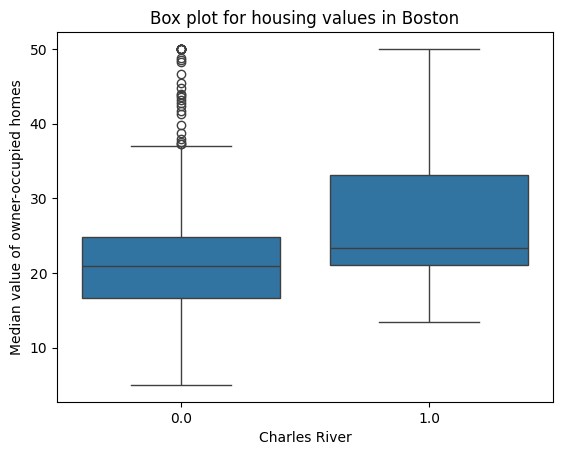

In [10]:
print("The median value of owner-occupied homes is slightly higher (around 25 vs 20) along the Charles River. There are also more price outliers for houses that are not along the river.")
ax = sns.boxplot(y='MEDV',x='CHAS',data=boston_df)
ax.set(xlabel='Charles River',ylabel='Median value of owner-occupied homes',title='Box plot for housing values in Boston')
pyplot.show()

The median value of owner-occupied homes is higher along the Charles River. There are also more price outliers for houses that are not along the river.


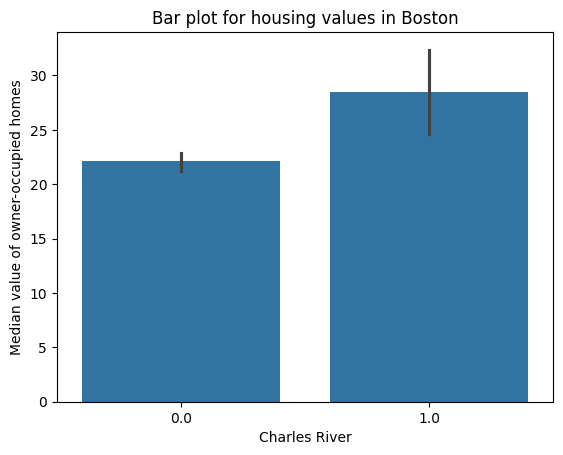

In [9]:
print("The median value of owner-occupied homes is higher along the Charles River. There are also more price outliers for houses that are not along the river.")
ax = sns.barplot(x='CHAS',y='MEDV',data=boston_df)
ax.set(xlabel='Charles River',ylabel='Median value of owner-occupied homes',title='Bar plot for housing values in Boston')
pyplot.show()

The housing values in Boston are, in average, lowest for the oldest houses.


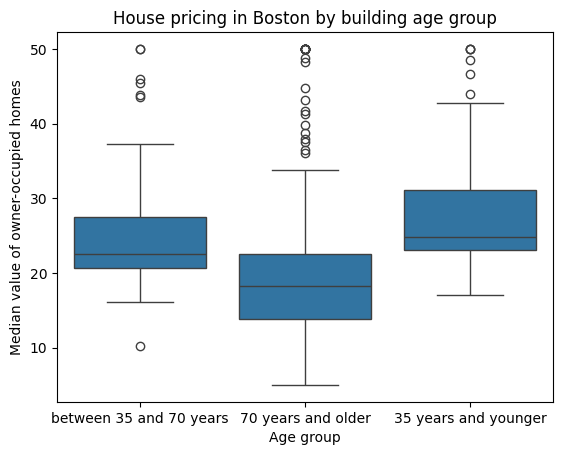

In [12]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

print('The housing values in Boston are, in average, lowest for the oldest houses.')
ax = sns.boxplot(y='MEDV',x='age_group',data=boston_df)
ax.set(xlabel='Age group',ylabel='Median value of owner-occupied homes',title='House pricing in Boston by building age group')
pyplot.show()

There seems to be a positive correlation between the proportion of non-retail businesses and the NOX concentration.


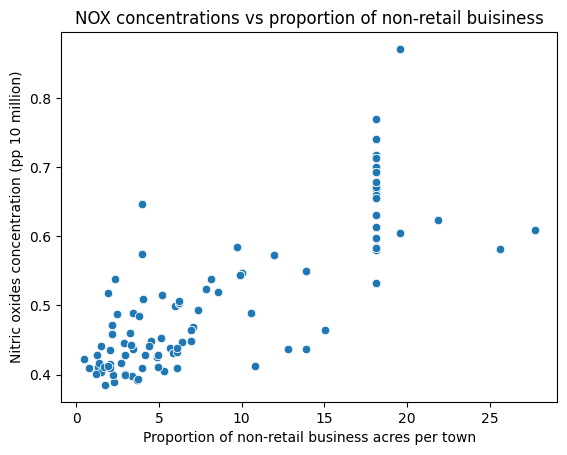

In [14]:
print('There seems to be a positive correlation between the proportion of non-retail businesses and the NOX concentration.')
ax = sns.scatterplot(y='NOX',x='INDUS',data=boston_df)
ax.set(xlabel='Proportion of non-retail business acres per town',ylabel='Nitric oxides concentration (pp 10 million)',title='NOX concentrations vs proportion of non-retail buisiness')
pyplot.show()

The peak pupil-teacher ratio by town is of around 20.


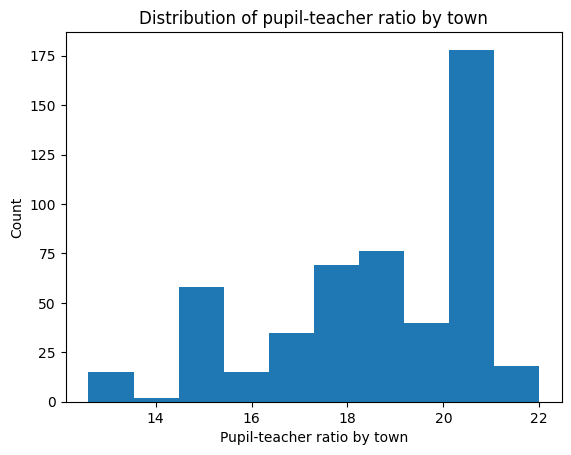

In [15]:
print('The peak pupil-teacher ratio by town is of around 20.')
ax = pyplot.hist(boston_df['PTRATIO'])
pyplot.xlabel('Pupil-teacher ratio by town')
pyplot.ylabel('Count')
pyplot.title('Distribution of pupil-teacher ratio by town')
pyplot.show()

In [22]:
print('Hypothesis: there is no significant difference in median value of houses bounded by the Charles river or not.\n')
print(scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = True))
print('\nOne concludes that, since pvalue<alpha=0.05, there IS a significant difference in median value of houses bounded by the Charles river or not.')

Hypothesis: there is no significant difference in median value of houses bounded by the Charles river or not.

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

One concludes that, since pvalue<alpha=0.05, there IS a significant difference in median value of houses bounded by the Charles river or not.


In [23]:
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print('Hypothesis: there is no difference in MEDV for each building age group.\n')

print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))
print('\nOne concludes that, since pvalue<alpha=0.05, there IS a relationship between MEDV and age_group.')

Hypothesis: there is no difference in MEDV for each building age group.

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15

One concludes that, since pvalue<alpha=0.05, there IS a relationship between MEDV and age_group.


In [26]:
print('Hypothesis: there is no significant difference in nitric oxide concentrations and proportion of non-retail business acres per town.\n') 
print(scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS']))
print('\nOne concludes that, since pvalue<alpha=0.05, there IS a relationship between nitric oxide concentrations and proportion of non-retail business acres per town.')

Hypothesis: there is no significant difference in nitric oxide concentrations and proportion of non-retail business acres per town.

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

One concludes that, since pvalue<alpha=0.05, there IS a relationship between nitric oxide concentrations and proportion of non-retail business acres per town.


In [28]:
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
print('Hypothesis: there is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.\n')
print(model.summary())

print('\nOne concludes that, since pvalue<alpha=0.05, there IS a relationship between an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.')
print('\nIn addition, the R-squared=0.062 value is relatively large, corresponding to R=0.25.')

Hypothesis: there is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 22 Feb 2024   Prob (F-statistic):           1.21e-08
Time:                        08:49:47   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      